# <font color='#faaa2e'>**Create the Base Model**</font>

In [3]:
import numpy as np
import pandas as pd
from src.workflow_manager.paths import data_path, ruleset_path
from src.pipelines.load_and_transform_pipeline import load_and_transform
from src.pipelines.dataframe_analyzer import get_values
from src.pipelines.one_hot_encoding import get_dummies

import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_columns',None)

In [4]:
data = load_and_transform(data_path, ruleset_path)
data.head()

,contract_nr,bonus_malus_class_liability,bonus_malus_class_comprehensive,age_insured_person,policy_start,tariff_type,type_of_insurance,comprehensive_product_included,deductible_fully_comprehensive,deductible_partially_comprehensive,payment_interval,insured_parties,profession_group,car_age_at_purchase,car_age_contract_start,annual_mileage,risk_predictor_zip_code,number_of_payment_faults,SF_KH_num,SF_VK_num,payment_fault,young_driver,Friday_first,deductible
0,1,SF1/2,SF1/2,34,YOB,Original,New Vehicle,KH,0,0,Monthly,Insured and Spouse/Partner,Standard,10,11,12000,5.0,1.0,0.5,0.5,1,0,OtherInsurer,0/0
1,2,SF31,SF31,55,YOB,Original,Change of Insurer,KH,0,0,Pay In Full,Insured and Spouse/Partner,Standard,2,7,9000,6.0,0.0,31.0,31.0,0,0,OtherInsurer,0/0
2,3,SF5,SF5,52,YOB,Original,New Vehicle,VK,300,150,Monthly,Insured and Spouse/Partner,Standard,11,12,20000,1.0,0.0,5.0,5.0,0,0,OtherInsurer,300/150
3,4,SF15,SF15,41,YEB,Original,Change of Insurer,TK,0,150,Monthly,Insured and Spouse/Partner,Standard,0,9,15000,6.0,0.0,15.0,15.0,0,0,OtherInsurer,0/150
4,5,SF17,SF18,42,YOB,Original,Change of Insurer,VK,300,150,Monthly,Insured and Spouse/Partner,Standard,0,2,15000,3.0,0.0,17.0,18.0,0,0,OtherInsurer,300/150


In [5]:
data.describe(percentiles=[0.01, 0.05, 0.1,.2,.3,.5,.8,.9,.95,.99]).T.drop(['count','mean'], axis=1).drop('contract_nr',axis=0)

,std,min,1%,5%,10%,20%,30%,50%,80%,90%,95%,99%,max
age_insured_person,13.811587,18.0,22.0,26.0,29.0,33.0,37.0,44.0,58.0,64.0,71.0,80.0,93.0
deductible_fully_comprehensive,235.982766,0.0,0.0,0.0,0.0,0.0,0.0,300.0,300.0,500.0,500.0,1000.0,1000.0
deductible_partially_comprehensive,90.569269,0.0,0.0,0.0,0.0,0.0,150.0,150.0,150.0,150.0,300.0,300.0,500.0
car_age_at_purchase,5.995697,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,15.0,18.0,21.0,36.0
car_age_contract_start,6.025014,-1.0,0.0,0.0,1.0,2.0,4.0,8.0,14.0,17.0,19.0,23.0,37.0
annual_mileage,5744.329090,600.0,2400.0,5000.0,6000.0,9000.0,9000.0,12000.0,15000.0,20000.0,25000.0,30000.0,90000.0
risk_predictor_zip_code,2.526982,1.0,1.0,1.0,2.0,2.0,3.0,5.0,8.0,9.0,9.0,9.0,9.0
number_of_payment_faults,1.464221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,7.0,17.0
SF_KH_num,10.089966,-1.0,0.0,0.5,0.5,2.0,5.0,11.0,21.0,27.0,32.0,37.0,44.0
SF_VK_num,10.233013,-1.0,0.0,0.5,0.5,2.0,5.0,11.0,22.0,28.0,32.0,37.0,44.0


## <font color='#f88231'>Bining and Grouping</font>
Carrying the results from Power Bi we will Bin, Group and Change the Data as follows:

### <font color='#f88231'>Age of insured Person</font>
>         'age_group_1': [:24]  
>         'age_group_2': [25:30]  
>         'age_group_3': [31:40]  
>         'age_group_4': [41:53]  
>         'age_group_5': [54:]  
          
### <font color='#f88231'>sf_tpl</font>
>         'sf_tpl_group_1': [:0.5]  
>         'sf_tpl_group_2': [1:3]  
>         'sf_tpl_group_3': [4:6]  
>         'sf_tpl_group_4': [7:10]  
>         'sf_tpl_group_5': [11:]  

### <font color='#f88231'>sf_fc</font>
>         'sf_fc_group_1': [M,S]  
>         'sf_fc_group_2': [0,0.5]  
>         'sf_fc_group_3': [1:3]  
>         'sf_fc_group_4': [4:10]  
>         'sf_fc_group_5': [11:19]  
>         'sf_fc_group_5': [20:]  


### <font color='#f88231'>Profession</font>
* OneHotEncode 'Public Service'

### <font color='#f88231'>Payment</font>
* OneHotEncode 'Pay in Full'

### <font color='#f88231'>Tariff</font>
* OneHotEncode 'Pay per km'

### <font color='#f88231'>Policy Start</font>
* OneHotEncode 'YEB'

### <font color='#f88231'>Cover</font>
* OneHotEncode 'VK', 'TK

### <font color='#f88231'>Cover</font>
* OneHotEncode 'New Vehicle', 'First Vehicle'

### <font color='#f88231'>Deductibles</font>
* new Columns für partial Deductables for Coverages


### <font color='#f88231'>Regional Classes</font>
>         'region_group_1': [1,4]  
>         'region_group_2': [5,6,7]  
>         'region_group_3': [2,3,8]  
>         'region_group_4': [9] 


### <font color='#f88231'>Insured Parties</font>
* OneHotEncode 'insured and others'


### <font color='#f88231'>Car Age Group (age at purchase)</font>
>         'car_age_pur_group_1': [1:4]  
>         'car_age_pur_group_2': [5:10]  
>         'car_age_pur_group_3': [11:]  

### <font color='#f88231'>Car Age Group (age at policy start)</font>
>         'car_age_cont_group_01': [:2]  
>         'car_age_cont_group_02': [3:6]  
>         'car_age_cont_group_03': [7:10]
>         'car_age_cont_group_04': [11]
>         'car_age_cont_group_05': [12]
>         'car_age_cont_group_06': [13]
>         'car_age_cont_group_07': [14]
>         'car_age_cont_group_08': [15]
>         'car_age_cont_group_09': [16]
>         'car_age_cont_group_10': [17]
>         'car_age_cont_group_11': [18:]

## <font color='#f88231'>Interactions</font>

### **tariff_type <-> payment_interval**
> [original , monthly]  
> [original , year]  
> [km , monthly]  
> [km , year]  

### **insured_Parties <-> payment_interval**
> [others , monthly]  
> [others , year]  
> [spouce , monthly]  
> [spouce , year]  





<Axes: >

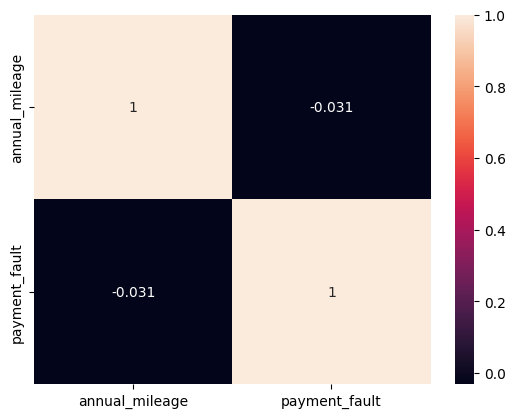

In [6]:
# Ignore the milage
sns.heatmap(data[['annual_mileage', 'payment_fault']].corr(), annot=True)


## <font color='#f88231'>Done</font>

---

